![60 deg unit vectors](https://media.discordapp.net/attachments/419632352730415115/792160496639016960/hex.png)

$ a_1 = x $

$ a_2 = \frac{1}{2} x + \frac{\sqrt{3}}{2} y $

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import copy
from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [3]:
x, y = sp.symbols('x y')
a1 = x
a2 = x/2 + sp.sqrt(3)/2 * y

In [4]:
d_test = {}
d_test[2*a1 + 3*a2] = 1

:)

## Part 1

In [5]:
example_input = [
"sesenwnenenewseeswwswswwnenewsewsw",
"neeenesenwnwwswnenewnwwsewnenwseswesw",
"seswneswswsenwwnwse",
"nwnwneseeswswnenewneswwnewseswneseene",
"swweswneswnenwsewnwneneseenw",
"eesenwseswswnenwswnwnwsewwnwsene",
"sewnenenenesenwsewnenwwwse",
"wenwwweseeeweswwwnwwe",
"wsweesenenewnwwnwsenewsenwwsesesenwne",
"neeswseenwwswnwswswnw",
"nenwswwsewswnenenewsenwsenwnesesenew",
"enewnwewneswsewnwswenweswnenwsenwsw",
"sweneswneswneneenwnewenewwneswswnese",
"swwesenesewenwneswnwwneseswwne",
"enesenwswwswneneswsenwnewswseenwsese",
"wnwnesenesenenwwnenwsewesewsesesew",
"nenewswnwewswnenesenwnesewesw",
"eneswnwswnwsenenwnwnwwseeswneewsenese",
"neswnwewnwnwseenwseesewsenwsweewe",
"wseweeenwnesenwwwswnew",
]

In [6]:
with open('../inputs/24.txt', 'r') as f:
    real_input = f.readlines()

In [7]:
def parse_line(line):
    i = 0
    pos = 0
    while i != len(line):
        if line[i] == 's':
            if line[i+1] == 'w':
                pos -= a2
            elif line[i+1] == 'e':
                pos = pos - a2 + a1
            i += 2
        elif line[i] == 'n':
            if line[i+1] == 'w':
                pos = pos + a2 - a1
            elif line[i+1] == 'e':
                pos += a2
            i += 2
        elif line[i] == 'w':
            pos -= a1
            i += 1
        elif line[i] == 'e':
            pos += a1
            i += 1
        else:
            print('Unknown direction: {}'.format(line[i]))
            i+= 1
    return pos

print(parse_line('nenenene'))
print(parse_line('eeww'))
print(parse_line('nenw'))
print(parse_line('seswnenw'))


2*x + 2*sqrt(3)*y
0
sqrt(3)*y
0


In [8]:
def paint_hexes(lines):
    d = {}
    for line in lines:
        pos = parse_line(line.strip())
        if d.get(pos, None):
            d[pos] = False
        else:
            d[pos] = True
    return d

In [9]:
def count_hexes(d):
    return sum(d.values())

In [10]:
d = paint_hexes(example_input)
sum(d.values())

10

In [11]:
hexes = paint_hexes(real_input)
sum(hexes.values())

282

<IPython.core.display.Javascript object>


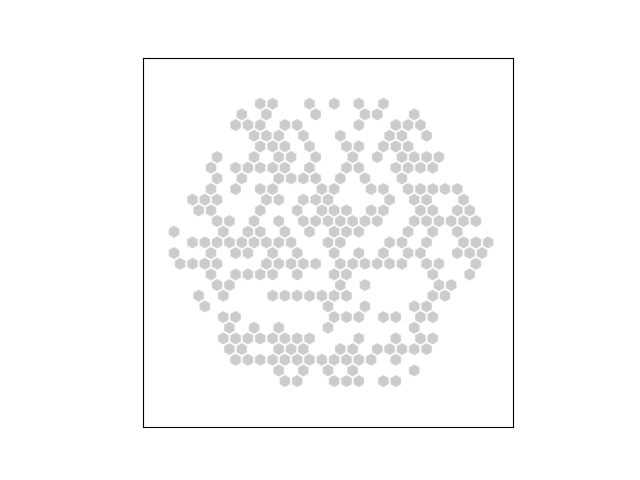

In [12]:
def plot_hexes(hexes, LIM=15):
    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')
    for h in hexes.keys():
        xx, yy = h.subs([(x,1),(y,0)]), h.subs([(x,0),(y,1)])
        if xx**2 + yy**2 > LIM**2:
            continue
        hex = RegularPolygon((xx, yy), numVertices=6, radius=0.5, 
                             orientation=np.radians(0), 
                             facecolor='white' if not hexes[h] else 'black', alpha=0.2, edgecolor='w')
        ax.add_patch(hex)
    ax.set_xlim([-LIM,LIM])
    ax.set_ylim([-LIM,LIM])
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
    plt.show()

def plot_ani(hex_history, LIM=60):
    fig, ax = plt.subplots(1)
    ax.set_aspect('equal')
    ax.set_xlim([-LIM,LIM])
    ax.set_ylim([-LIM,LIM])

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
    
    def init():
        frames = []
        for h in hex_history[0].keys():
            xx, yy = h.subs([(x,1),(y,0)]), h.subs([(x,0),(y,1)])
            if xx**2 + yy**2 > LIM**2:
                continue
            hex = RegularPolygon((xx, yy), numVertices=6, radius=0.5, 
                                 orientation=np.radians(0), 
                                 facecolor='white' if not hex_history[i][h] else 'black', alpha=0.2, edgecolor='w')
            frames.append(ax.add_patch(hex))
        return frames
    
    def animate(i):
        print('Animating frame {}...'.format(i))
        frames = []
        for h in hex_history[i].keys():
            xx, yy = h.subs([(x,1),(y,0)]), h.subs([(x,0),(y,1)])
            if xx**2 + yy**2 > LIM**2:
                continue
            hex = RegularPolygon((xx, yy), numVertices=6, radius=0.5, 
                                 orientation=np.radians(0), 
                                 facecolor='white' if not hex_history[i][h] else 'black', alpha=0.2, edgecolor='w')
            frames.append(ax.add_patch(hex))
        return frames
    
    anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
    plt.show()
    anim.save('./animation.gif', writer='imagemagick', fps=60)

plot_hexes(hexes)

```
    Any black tile with zero or more than 2 black tiles immediately adjacent to it is flipped to white.
    Any white tile with exactly 2 black tiles immediately adjacent to it is flipped to black.
```

In [13]:
def count_painted_neighbors(d, key):
    return sum([d.get(key+a1, 0),
                d.get(key-a1, 0),
                d.get(key+a2, 0),
                d.get(key-a2, 0),
                d.get(key+a1-a2, 0),
                d.get(key-a1+a2, 0)])
count_painted_neighbors(hexes, 0)

3

In [14]:
def decide_tile(d, key):
    count = count_painted_neighbors(d, key)
    if d.get(key, False):
        if not 1 <= count <= 2:
            return False
        else:
            return True
    else:
        if count == 2:
            return True
        else:
            return False
decide_tile(hexes, 4*x)

True

In [18]:
def apply_round(d, R=60):
    new_d = copy.deepcopy(d)
    visited = set()
    for i in range(-R,R+1):
        for j in range(-R,R+1):
            coord = a1*i + a2*j
            if coord in visited:
                continue
            else:
                visited.add(coord)
            new_d[coord] = decide_tile(d, coord)
    return new_d

<IPython.core.display.Javascript object>


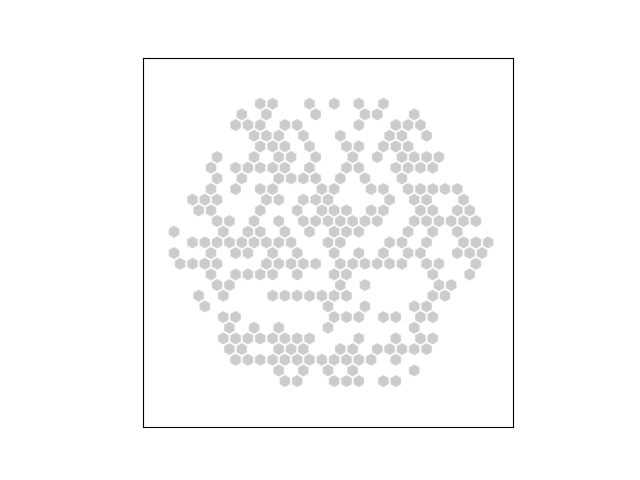

<IPython.core.display.Javascript object>


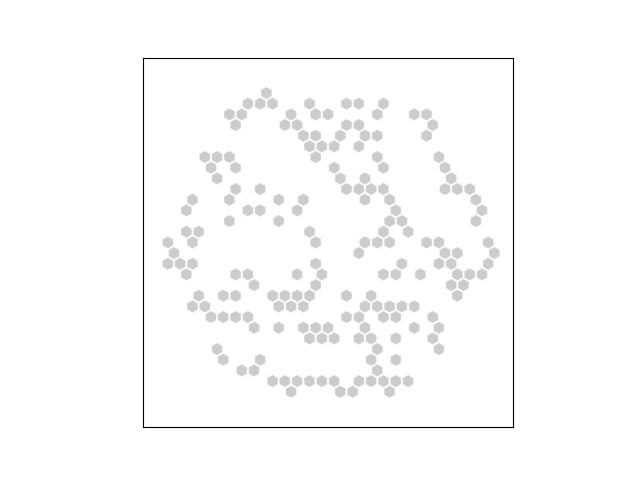

In [19]:
plot_hexes(hexes)
new_hexes = apply_round(hexes)
plot_hexes(new_hexes)

In [20]:
hh = copy.deepcopy(hexes)
hist = [hh]
for i in range(100):
    print('Running step {}'.format(i+1))
    hh = apply_round(hh, R=30)
    hist.append(hh)

Running step 1
Running step 2
Running step 3
Running step 4
Running step 5
Running step 6
Running step 7
Running step 8
Running step 9
Running step 10
Running step 11
Running step 12
Running step 13
Running step 14
Running step 15
Running step 16
Running step 17
Running step 18
Running step 19
Running step 20
Running step 21
Running step 22
Running step 23
Running step 24
Running step 25
Running step 26
Running step 27
Running step 28
Running step 29
Running step 30
Running step 31
Running step 32
Running step 33
Running step 34
Running step 35
Running step 36
Running step 37
Running step 38
Running step 39
Running step 40
Running step 41
Running step 42
Running step 43
Running step 44
Running step 45
Running step 46
Running step 47
Running step 48
Running step 49
Running step 50
Running step 51
Running step 52
Running step 53
Running step 54
Running step 55
Running step 56
Running step 57
Running step 58
Running step 59
Running step 60
Running step 61
Running step 62
Running step 63
R

In [28]:
sum(hh.values())

3445

<IPython.core.display.Javascript object>


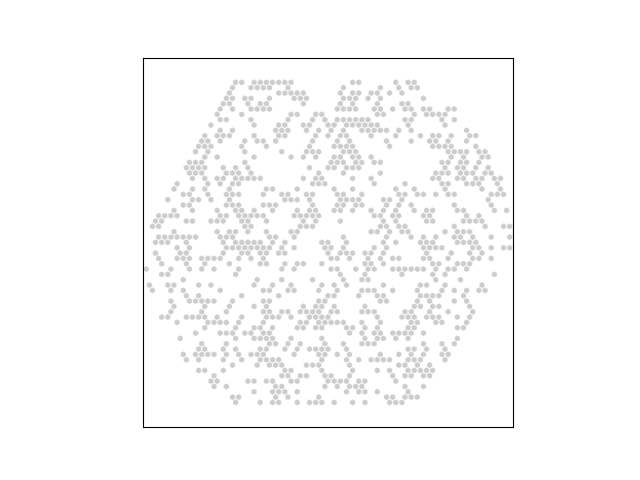

In [21]:
plot_hexes(hh, 30)

<IPython.core.display.Javascript object>


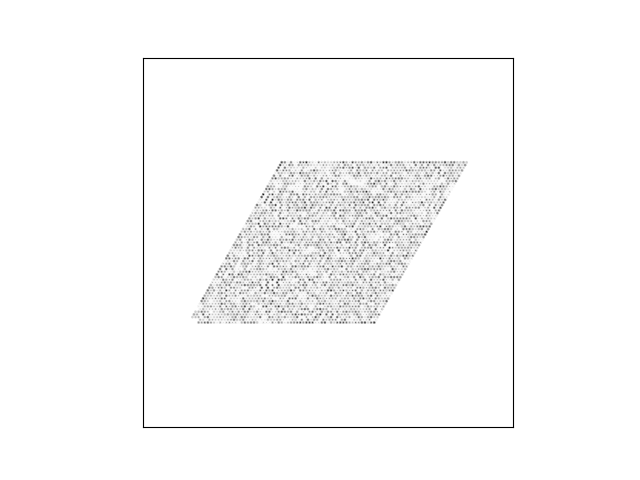

Animating frame 0...
Animating frame 1...
Animating frame 2...
Animating frame 3...
Animating frame 4...
Animating frame 5...
Animating frame 6...
Animating frame 7...
Animating frame 8...
Animating frame 9...
Animating frame 10...
Animating frame 11...
Animating frame 12...
Animating frame 13...
Animating frame 14...
Animating frame 15...
Animating frame 16...
Animating frame 17...
Animating frame 18...
Animating frame 19...
Animating frame 20...
Animating frame 21...
Animating frame 22...
Animating frame 23...
Animating frame 24...
Animating frame 25...
Animating frame 26...
Animating frame 27...
Animating frame 28...
Animating frame 29...
Animating frame 30...
Animating frame 31...
Animating frame 32...
Animating frame 33...
Animating frame 34...
Animating frame 35...
Animating frame 36...
Animating frame 37...
Animating frame 38...
Animating frame 39...
Animating frame 40...
Animating frame 41...
Animating frame 42...
Animating frame 43...
Animating frame 44...
Animating frame 45..

In [22]:
plot_ani(hist)